In [220]:
import pandas as pd
import sklearn
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Part I

### Randomized Hill Climbing

In [25]:
def RandHill(problem, name, maximize = False):
        
    # best max_attempts - Fitness
    
    compares = []
    intervals, interval_unit = 100, 1
    for i in range(1, intervals + 1):
        max_attempts = i * interval_unit
        
        best_state, best_fitness = mlrose.random_hill_climb(
            problem,max_attempts=max_attempts,random_state=2)

        compares.append([max_attempts, best_fitness])

    max_attempts_for_graphs_RH = pd.DataFrame(compares, columns=["max_attempts", "best_fitness"])
    ax = max_attempts_for_graphs_RH.plot(x="max_attempts", y="best_fitness", title="Max_attempts Plot")
    ax.set_xlabel("Max Attempts")
    ax.set_ylabel("Best Fitness")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/RandHill/fitness-max_attempts_" + name +".png")
    
    if maximize == False:
        min_fitness =  max_attempts_for_graphs_RH["best_fitness"].min()
    else: 
        min_fitness =  max_attempts_for_graphs_RH["best_fitness"].max()   
    max_attempts = int(max_attempts_for_graphs_RH[max_attempts_for_graphs_RH["best_fitness"] == min_fitness]["max_attempts"].min())


    
    
    # best max_iters - Fitness
    
    compares = []
    intervals,interval_unit = 100,5
    for i in range(1, intervals + 1):
        max_iters = i * interval_unit
        
        best_state, best_fitness = mlrose.random_hill_climb(
            problem,max_attempts=max_attempts,max_iters=max_iters,random_state=2)
       
        compares.append([max_iters, best_fitness])
        
    max_iters_for_graphs_RH = pd.DataFrame(compares, columns=["max_iters", "best_fitness"])
    ax = max_iters_for_graphs_RH.plot(x="max_iters", y='best_fitness', title="Max_iters Plot")
    ax.set_xlabel("Max Iters")
    ax.set_ylabel("Best Fitness")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/RandHill/fitness-max_iters_" + name +".png")
    
    if maximize == False:
        min_fitness =  max_iters_for_graphs_RH["best_fitness"].min()
    else: min_fitness =  max_iters_for_graphs_RH["best_fitness"].max()
    max_iters = int(max_iters_for_graphs_RH[max_iters_for_graphs_RH["best_fitness"] == min_fitness]["max_iters"].min())

    
    
    
    # best restarts - Fitness
    
    compares = []
    intervals,interval_unit = 50,1
    for i in range(1, intervals + 1):
        restarts = i * interval_unit
        
        best_state, best_fitness = mlrose.random_hill_climb(
            problem,max_attempts=max_attempts,max_iters=max_iters,restarts=restarts,random_state=2)
       
        compares.append([restarts, best_fitness])
        
    restarts_for_graphs_RH = pd.DataFrame(compares, columns=["restarts", "best_fitness"])
    ax = restarts_for_graphs_RH.plot(x="restarts", y='best_fitness', title="Restarts Plot")
    ax.set_xlabel("Restarts")
    ax.set_ylabel("Best Fitness")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/RandHill/fitness-restarts_" + name +".png")
    
    if maximize == False:
        min_fitness =  restarts_for_graphs_RH["best_fitness"].min()
    else: min_fitness =  restarts_for_graphs_RH["best_fitness"].max()
    restarts = int(restarts_for_graphs_RH[restarts_for_graphs_RH["best_fitness"] == min_fitness]["restarts"].min())
    
    
    
    # Evaluation and Time
    start_time = time.perf_counter()
    
    best_state, best_fitness, curve = mlrose.random_hill_climb(
        problem,max_iters=max_iters,max_attempts=max_attempts,random_state=2, curve=True,restarts =restarts)
    
    run_time = time.perf_counter() - start_time
    
    evals_for_graphs_RH = pd.DataFrame(curve)
    evals_for_graphs_RH.reset_index(inplace=True)
    evals_for_graphs_RH.columns = ['evaluation', "fitness"]
    ax = evals_for_graphs_RH.plot(x="evaluation", y='fitness', title="Evaluation Plot")
    ax.set_xlabel("Evaluation Number")
    ax.set_ylabel("Fitness Score")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/RandHill/fitness-evaluation_" + name +".png")
    
#     times = [i for i in np.arange(0, run_time, run_time/float(curve.shape[0]))]
#     zipped = list(zip(times,list(curve)))
#     times_for_graphs_RH = pd.DataFrame(zipped, columns=['run_time', "fitness"])
#     ax = times_for_graphs_RH.plot(x="run_time", y='fitness', title="Run_time Plot")
#     ax.set_xlabel("Run Time")
#     ax.set_ylabel("Fitness")
#     plt.savefig("C:/Users/jzhang/Desktop/HW2/RandHill/fitness-run_time_" + name +".png")
    
    print('The max attempts is: ', max_attempts)
    print('The max iters is: ', max_iters)
    print('The restarts is: ', restarts)
    print('The best state is: ', best_state)
    print('The fitness is: ', best_fitness)
    print('Run Time is: ', run_time)
    
    return  max_attempts,max_iters,best_state, best_fitness,max_attempts_for_graphs_RH, max_iters_for_graphs_RH,evals_for_graphs_RH, run_time

### Simulated Annealing

In [26]:
def SimAnneal(problem, name, maximize = False):
    
    schedule = mlrose.ExpDecay()
    
    
    # best max_attempts - Fitness
    
    compares = []
    intervals, interval_unit = 100, 1
    for i in range(1, intervals + 1):
        max_attempts = i * interval_unit
        
        best_state, best_fitness = mlrose.simulated_annealing(
            problem,schedule=schedule,max_attempts=max_attempts,random_state=2)

        compares.append([max_attempts, best_fitness])

    max_attempts_for_graphs_SA = pd.DataFrame(compares, columns=["max_attempts", "best_fitness"])
    ax = max_attempts_for_graphs_SA.plot(x="max_attempts", y="best_fitness", title="Max_attempts Plot")
    ax.set_xlabel("Max Attempts")
    ax.set_ylabel("Best Fitness")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/SimAnneal/fitness-max_attempts_" + name +".png")
    
    if maximize == False:
        min_fitness =  max_attempts_for_graphs_SA["best_fitness"].min()
    else:min_fitness =  max_attempts_for_graphs_SA["best_fitness"].max()
    max_attempts = int(max_attempts_for_graphs_SA[max_attempts_for_graphs_SA["best_fitness"] == min_fitness]["max_attempts"].min())


    
    
    # best max_iters - Fitness
    
    compares = []
    intervals,interval_unit = 100,5
    for i in range(1, intervals + 1):
        max_iters = i * interval_unit
        
        best_state, best_fitness = mlrose.simulated_annealing(
            problem,schedule=schedule,max_attempts=max_attempts,max_iters=max_iters,random_state=2)
       
        compares.append([max_iters, best_fitness])
        
    max_iters_for_graphs_SA = pd.DataFrame(compares, columns=["max_iters", "best_fitness"])
    ax = max_iters_for_graphs_SA.plot(x="max_iters", y='best_fitness', title="Max_iters Plot")
    ax.set_xlabel("Max Iters")
    ax.set_ylabel("Best Fitness")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/SimAnneal/fitness-max_iters_" + name +".png")
    
    if maximize == False:
        min_fitness =  max_iters_for_graphs_SA["best_fitness"].min()
    else: min_fitness =  max_iters_for_graphs_SA["best_fitness"].max()
    max_iters = int(max_iters_for_graphs_SA[max_iters_for_graphs_SA["best_fitness"] == min_fitness]["max_iters"].min())

    
    # Time
    start_time = time.perf_counter()
    
    best_state, best_fitness, curve = mlrose.simulated_annealing(
        problem,schedule=schedule,max_iters=max_iters,max_attempts=max_attempts,random_state=2, curve=True)
    
    run_time = time.perf_counter() - start_time
    
    evals_for_graphs_SA = pd.DataFrame(curve)
    evals_for_graphs_SA.reset_index(inplace=True)
    evals_for_graphs_SA.columns = ['evaluation', "fitness"]
    ax = evals_for_graphs_SA.plot(x="evaluation", y='fitness', title="Evaluation Plot")
    ax.set_xlabel("Evaluation Number")
    ax.set_ylabel("Fitness Score")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/SimAnneal/fitness-evaluation_" + name +".png")
    
    print('The max attempts is: ', max_attempts)
    print('The max iters is: ', max_iters)
    print('The best state is: ', best_state)
    print('The fitness is: ', best_fitness)
    print('Run Time is: ', run_time)
    
    return  max_attempts,max_iters,best_state, best_fitness,max_attempts_for_graphs_SA, max_iters_for_graphs_SA,evals_for_graphs_SA, run_time

### Genetic Algorithm

In [4]:
def Genetic(problem, name, maximize = False):
    
    # default
    max_attempts = 100
    max_iters = np.inf
    mutation_prob = 0.2
    pop_size = 200
    
    
    # best pop_size - Fitness
    
    compares = []
    intervals,interval_unit = 30,10
    for i in range(1, intervals+1):
        pop_size = i * interval_unit
        
        best_state, best_fitness = mlrose.genetic_alg(
            problem,max_attempts=max_attempts,max_iters=max_iters,mutation_prob=mutation_prob,pop_size=pop_size,random_state=2)
       
        compares.append([pop_size, best_fitness])
        
    pop_size_for_graphs_GA = pd.DataFrame(compares, columns=["pop_size", "best_fitness"])
    ax = pop_size_for_graphs_GA.plot(x="pop_size", y='best_fitness', title="pop_size Plot")
    ax.set_xlabel("Popupation size")
    ax.set_ylabel("Best Fitness")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/Genetic/fitness-pop_size_" + name +".png")
    
    if maximize == False:
        min_fitness =  pop_size_for_graphs_GA["best_fitness"].min()
    else: min_fitness =  pop_size_for_graphs_GA["best_fitness"].max()
    pop_size = int(pop_size_for_graphs_GA[pop_size_for_graphs_GA["best_fitness"] == min_fitness]["pop_size"].min())
    
    print('The pop size is: ', pop_size)
    
    
    
    # best mutation_prob - Fitness
    
    compares = []
    for i in np.arange(0.1, 1, 0.1):
        mutation_prob = i
        
        best_state, best_fitness = mlrose.genetic_alg(
            problem,max_attempts=max_attempts,max_iters=max_iters,mutation_prob=mutation_prob, pop_size=pop_size, random_state=2)
       
        compares.append([mutation_prob, best_fitness])
        
    mutation_prob_for_graphs_GA = pd.DataFrame(compares, columns=["mutation_prob", "best_fitness"])
    ax = mutation_prob_for_graphs_GA.plot(x="mutation_prob", y='best_fitness', title="mutation_prob Plot")
    ax.set_xlabel("mutation_prob")
    ax.set_ylabel("Best Fitness")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/Genetic/fitness-mutation_prob_" + name +".png")
    
    if maximize == False:
        min_fitness =  mutation_prob_for_graphs_GA["best_fitness"].min()
    else: min_fitness =  mutation_prob_for_graphs_GA["best_fitness"].max()
    mutation_prob = mutation_prob_for_graphs_GA[mutation_prob_for_graphs_GA["best_fitness"] == min_fitness]["mutation_prob"].min()
    
    print('The mutation prob is: ', mutation_prob)
    
    
    
    # best max_attempts - Fitness
    
    compares = []
    intervals, interval_unit = 100, 1
    for i in range(1, intervals + 1):
        max_attempts = i * interval_unit
        
        best_state, best_fitness = mlrose.genetic_alg(
            problem,max_attempts=max_attempts,mutation_prob=mutation_prob,pop_size=pop_size,random_state=2)

        compares.append([max_attempts, best_fitness])

    max_attempts_for_graphs_GA = pd.DataFrame(compares, columns=["max_attempts", "best_fitness"])
    ax = max_attempts_for_graphs_GA.plot(x="max_attempts", y="best_fitness", title="Max_attempts Plot")
    ax.set_xlabel("Max Attempts")
    ax.set_ylabel("Best Fitness")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/Genetic/fitness-max_attempts_" + name +".png")
    
    if maximize == False:
        min_fitness =  max_attempts_for_graphs_GA["best_fitness"].min()
    else: min_fitness =  max_attempts_for_graphs_GA["best_fitness"].max()
    max_attempts = int(max_attempts_for_graphs_GA[max_attempts_for_graphs_GA["best_fitness"] == min_fitness]["max_attempts"].min())

    print('The max attempts is: ', max_attempts)
    

    
    # best max_iters - Fitness
    
    compares = []
    intervals,interval_unit = 100,5
    for i in range(1, intervals + 1):
        max_iters = i * interval_unit
        
        best_state, best_fitness = mlrose.genetic_alg(
            problem,max_attempts=max_attempts,max_iters=max_iters,mutation_prob=mutation_prob,pop_size=pop_size,random_state=2)
       
        compares.append([max_iters, best_fitness])
        
    max_iters_for_graphs_GA = pd.DataFrame(compares, columns=["max_iters", "best_fitness"])
    ax = max_iters_for_graphs_GA.plot(x="max_iters", y='best_fitness', title="Max_iters Plot")
    ax.set_xlabel("Max Iters")
    ax.set_ylabel("Best Fitness")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/Genetic/fitness-max_iters_" + name +".png")
    
    if maximize == False:
        min_fitness =  max_iters_for_graphs_GA["best_fitness"].min()
    else: min_fitness =  max_iters_for_graphs_GA["best_fitness"].max()
    max_iters = int(max_iters_for_graphs_GA[max_iters_for_graphs_GA["best_fitness"] == min_fitness]["max_iters"].min())
    
    print('The max iters is: ', max_iters)
    
    
    
    # Time
    start_time = time.perf_counter()
    
    best_state, best_fitness, curve = mlrose.genetic_alg(
        problem,max_iters=max_iters,max_attempts=max_attempts,random_state=2, curve=True,mutation_prob=mutation_prob,pop_size=pop_size)
    
    run_time = time.perf_counter() - start_time

    evals_for_graphs_GA = pd.DataFrame(curve)
    evals_for_graphs_GA.reset_index(inplace=True)
    evals_for_graphs_GA.columns = ['evaluation', "fitness"]
    ax = evals_for_graphs_GA.plot(x="evaluation", y='fitness', title="Evaluation Plot")
    ax.set_xlabel("Evaluation Number")
    ax.set_ylabel("Fitness Score")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/Genetic/fitness-evaluation_" + name +".png")
    
    print('The best state is: ', best_state)
    print('The fitness is: ', best_fitness)
    print('Run Time is: ', run_time)
    
    return  max_attempts,max_iters,best_state, best_fitness,max_attempts_for_graphs_GA, max_iters_for_graphs_GA,evals_for_graphs_GA, run_time

### MIMIC

In [11]:
def MIMIC(problem, name, maximize = False):
    
    # default
    max_attempts = 100
    max_iters = np.inf
    keep_pct = 0.2
    pop_size = 200
    
    
    # best pop_size - Fitness
    
    compares = []
    intervals,interval_unit = 30,10
    for i in range(1, intervals+1):
        pop_size = i * interval_unit
        
        best_state, best_fitness = mlrose.mimic(
            problem,max_attempts=max_attempts,max_iters=max_iters,
            keep_pct=keep_pct,pop_size=pop_size,random_state=2,fast_mimic = True)
       
        compares.append([pop_size, best_fitness])
        
    pop_size_for_graphs_M = pd.DataFrame(compares, columns=["pop_size", "best_fitness"])
    ax = pop_size_for_graphs_M.plot(x="pop_size", y='best_fitness', title="pop_size Plot")
    ax.set_xlabel("Popupation size")
    ax.set_ylabel("Best Fitness")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/MIMIC/fitness-pop_size_" + name +".png")
    
    if maximize == False:
        min_fitness =  pop_size_for_graphs_M["best_fitness"].min()
    else: min_fitness =  pop_size_for_graphs_M["best_fitness"].max()
    pop_size = int(pop_size_for_graphs_M[pop_size_for_graphs_M["best_fitness"] == min_fitness]["pop_size"].min())
    
    print('The pop size is: ', pop_size)
    
    
    
    # best keep_pct - Fitness
    
    compares = []
    for i in np.arange(0.1, 1, 0.1):
        keep_pct = i
        
        best_state, best_fitness = mlrose.mimic(
            problem,max_attempts=max_attempts,max_iters=max_iters,
            keep_pct=keep_pct, pop_size=pop_size, random_state=2,fast_mimic = True)
       
        compares.append([keep_pct, best_fitness])
        
    keep_pct_for_graphs_M = pd.DataFrame(compares, columns=["keep_pct", "best_fitness"])
    ax = keep_pct_for_graphs_M.plot(x="keep_pct", y='best_fitness', title="keep_pct Plot")
    ax.set_xlabel("keep_pct")
    ax.set_ylabel("Best Fitness")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/MIMIC/fitness-keep_pct_" + name +".png")
    
    if maximize == False:
        min_fitness =  keep_pct_for_graphs_M["best_fitness"].min()
    else: min_fitness =  keep_pct_for_graphs_M["best_fitness"].max()
    keep_pct = keep_pct_for_graphs_M[keep_pct_for_graphs_M["best_fitness"] == min_fitness]["keep_pct"].min()
    
    print('The keep pct is: ', keep_pct)
    
    
    
    # best max_attempts - Fitness
    
    compares = []
    intervals, interval_unit = 100, 1
    for i in range(1, intervals + 1):
        max_attempts = i * interval_unit
        
        best_state, best_fitness = mlrose.mimic(
            problem,max_attempts=max_attempts,keep_pct=keep_pct,pop_size=pop_size,random_state=2,fast_mimic = True)

        compares.append([max_attempts, best_fitness])

    max_attempts_for_graphs_M = pd.DataFrame(compares, columns=["max_attempts", "best_fitness"])
    ax = max_attempts_for_graphs_M.plot(x="max_attempts", y="best_fitness", title="Max_attempts Plot")
    ax.set_xlabel("Max Attempts")
    ax.set_ylabel("Best Fitness")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/MIMIC/fitness-max_attempts_" + name +".png")
    
    if maximize == False:
        min_fitness =  max_attempts_for_graphs_M["best_fitness"].min()
    else: min_fitness =  max_attempts_for_graphs_M["best_fitness"].max()
    max_attempts = int(max_attempts_for_graphs_M[max_attempts_for_graphs_M["best_fitness"] == min_fitness]["max_attempts"].min())
    
    print('The max attempts is: ', max_attempts)
    
    
    
    # best max_iters - Fitness
    
    compares = []
    intervals,interval_unit = 100,5
    for i in range(1, intervals + 1):
        max_iters = i * interval_unit
        
        best_state, best_fitness = mlrose.mimic(
            problem,max_attempts=max_attempts,max_iters=max_iters,keep_pct=keep_pct,pop_size=pop_size,random_state=2,fast_mimic = True)
       
        compares.append([max_iters, best_fitness])
        
    max_iters_for_graphs_M = pd.DataFrame(compares, columns=["max_iters", "best_fitness"])
    ax = max_iters_for_graphs_M.plot(x="max_iters", y='best_fitness', title="Max_iters Plot")
    ax.set_xlabel("Max Iters")
    ax.set_ylabel("Best Fitness")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/MIMIC/fitness-max_iters_" + name +".png")
    
    if maximize == False:
        min_fitness =  max_iters_for_graphs_M["best_fitness"].min()
    else: min_fitness =  max_iters_for_graphs_M["best_fitness"].max()
    max_iters = int(max_iters_for_graphs_M[max_iters_for_graphs_M["best_fitness"] == min_fitness]["max_iters"].min())
    
    print('The max iters is: ', max_iters)
    
    
    
    # Time
    start_time = time.perf_counter()
    
    best_state, best_fitness, curve = mlrose.mimic(
        problem,max_iters=max_iters,max_attempts=max_attempts,random_state=2, curve=True,keep_pct=keep_pct,pop_size=pop_size,fast_mimic = True)
    
    run_time = time.perf_counter() - start_time

    evals_for_graphs_M = pd.DataFrame(curve)
    evals_for_graphs_M.reset_index(inplace=True)
    evals_for_graphs_M.columns = ['evaluation', "fitness"]
    ax = evals_for_graphs_M.plot(x="evaluation", y='fitness', title="Evaluation Plot")
    ax.set_xlabel("Evaluation Number")
    ax.set_ylabel("Fitness Score")
    plt.savefig("C:/Users/jzhang/Desktop/HW2/MIMIC/fitness-evaluation_" + name +".png")
    
    print('The best state is: ', best_state)
    print('The fitness is: ', best_fitness)
    print('Run Time is: ', run_time)
    
    return  max_attempts,max_iters,best_state, best_fitness,max_attempts_for_graphs_M, max_iters_for_graphs_M,evals_for_graphs_M, run_time 

## Problem 1 - FourPeaks

In [14]:
fitness = mlrose.FourPeaks(t_pct=0.1)
problem_FourPeaks = mlrose.DiscreteOpt(length=50, fitness_fn=fitness, maximize=True, max_val=2)

The max attempts is:  88
The max iters is:  195
The restarts is:  10
The best state is:  [1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 0 0]
The fitness is:  58.0
Run Time is:  0.018878200000017387


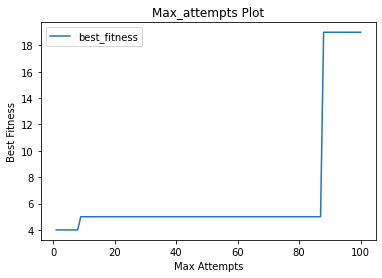

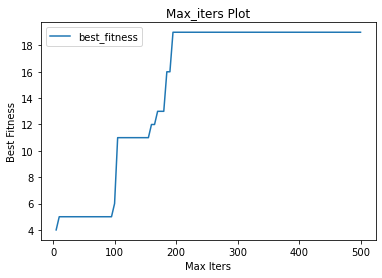

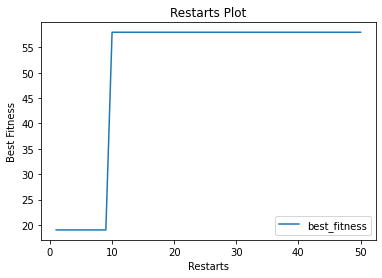

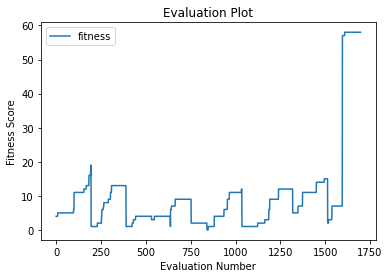

In [27]:
RH_max_attempts,RH_max_iters,RH_best_state,RH_best_fitness,max_attempts_for_graphs_RH, max_iters_for_graphs_RH,evals_for_graphs_RH, RH_run_time\
= RandHill(problem_FourPeaks,  "FourPeaks", maximize = True)

The max attempts is:  22
The max iters is:  395
The best state is:  [1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
The fitness is:  23.0
Run Time is:  0.00919270000031247


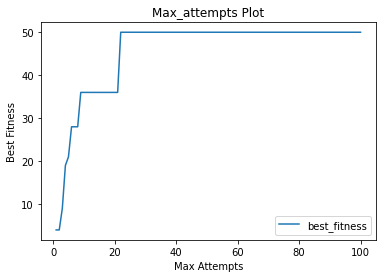

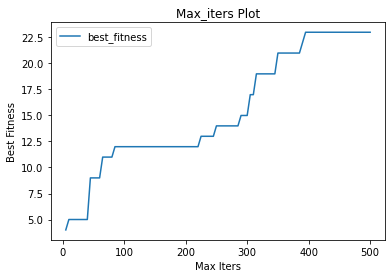

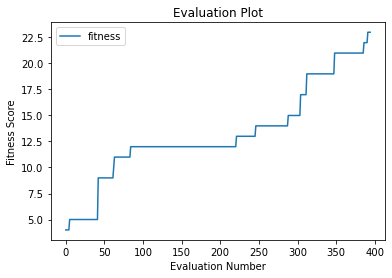

In [28]:
SA_max_attempts,SA_max_iters,SA_best_state,SA_best_fitness,max_attempts_for_graphs_SA, max_iters_for_graphs_SA,evals_for_graphs_SA, SA_run_time\
= SimAnneal(problem_FourPeaks,  "FourPeaks", maximize = True)

The pop size is:  190
The mutation prob is:  0.1
The max attempts is:  27
The max iters is:  60
The best state is:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 1 0 0 1 1 0 0 0 0 0 0 0]
The fitness is:  71.0
Run Time is:  0.6734216000000401


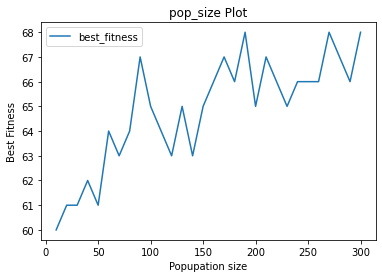

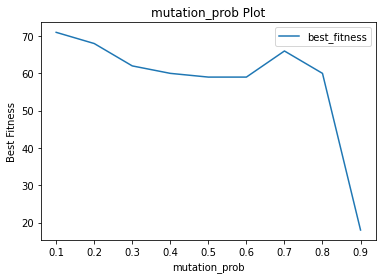

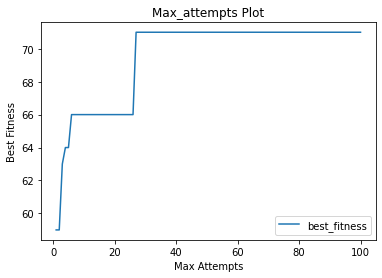

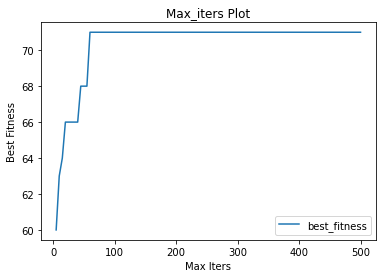

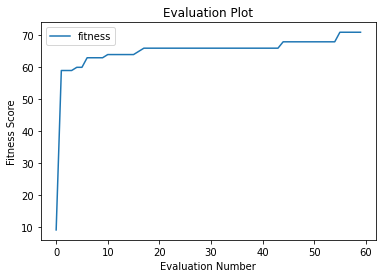

In [9]:
GA_max_attempts,GA_max_iters,GA_best_state,GA_best_fitness,max_attempts_for_graphs_GA, max_iters_for_graphs_GA,evals_for_graphs_GA, GA_run_time\
= Genetic(problem_FourPeaks,  "FourPeaks", maximize = True)

The pop size is:  40
The keep pct is:  0.2
The max attempts is:  1
The max iters is:  5
The best state is:  [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 0]
The fitness is:  63.0
Run Time is:  0.04299110000010842


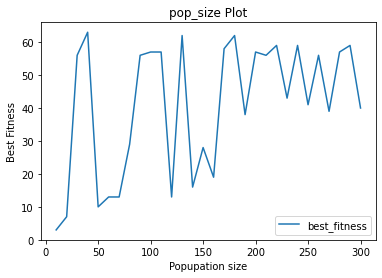

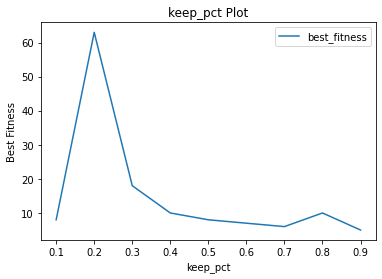

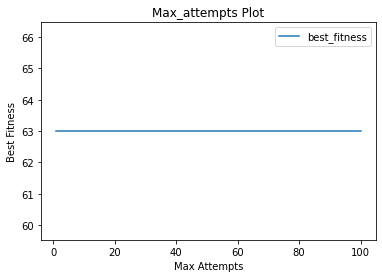

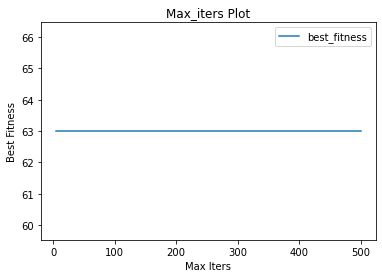

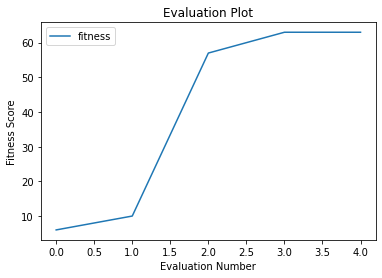

In [12]:
M_max_attempts,M_max_iters,M_best_state,M_best_fitness,max_attempts_for_graphs_M, max_iters_for_graphs_M,evals_for_graphs_M, M_run_time\
= MIMIC(problem_FourPeaks, "FourPeaks", maximize = True)

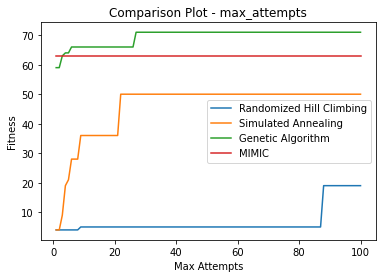

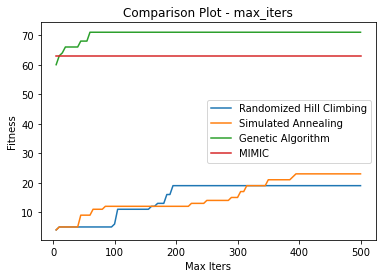

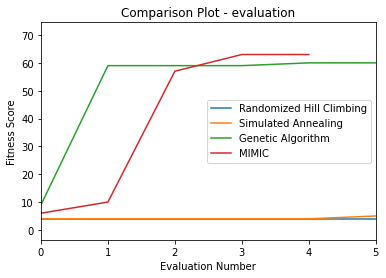

In [32]:
# Comparison

max_attempts_for_graphs_RH["alg"] = "Randomized Hill Climbing"
max_attempts_for_graphs_SA["alg"] = "Simulated Annealing"
max_attempts_for_graphs_GA["alg"] = "Genetic Algorithm"
max_attempts_for_graphs_M["alg"] = "MIMIC"

max_iters_for_graphs_RH["alg"] = "Randomized Hill Climbing"
max_iters_for_graphs_SA["alg"] = "Simulated Annealing"
max_iters_for_graphs_GA["alg"] = "Genetic Algorithm"
max_iters_for_graphs_M["alg"] = "MIMIC"

evals_for_graphs_RH["alg"] = "Randomized Hill Climbing"
evals_for_graphs_SA["alg"] = "Simulated Annealing"
evals_for_graphs_GA["alg"] = "Genetic Algorithm"
evals_for_graphs_M["alg"] = "MIMIC"

max_attempts_for_graphs = pd.concat([max_attempts_for_graphs_RH, max_attempts_for_graphs_SA,\
                           max_attempts_for_graphs_GA, max_attempts_for_graphs_M], ignore_index=True)
ax = sns.lineplot(data = max_attempts_for_graphs, x="max_attempts", y='best_fitness', hue = "alg")
ax.legend_.set_title(None)
ax.set_xlabel("Max Attempts")
ax.set_ylabel("Fitness")
ax.set_title("Comparison Plot - max_attempts")
plt.savefig("C:/Users/jzhang/Desktop/HW2/All/max_attempts_compare_FourPeaks.png")
plt.show()
plt.close()

max_iters_for_graphs = pd.concat([max_iters_for_graphs_RH, max_iters_for_graphs_SA,\
                           max_iters_for_graphs_GA, max_iters_for_graphs_M], ignore_index=True)
ax = sns.lineplot(data = max_iters_for_graphs, x="max_iters", y='best_fitness', hue = "alg")
ax.legend_.set_title(None)
ax.set_xlabel("Max Iters")
ax.set_ylabel("Fitness")
ax.set_title("Comparison Plot - max_iters")
plt.savefig("C:/Users/jzhang/Desktop/HW2/All/max_iters_compare_FourPeaks.png")
plt.show()
plt.close()

evals_for_graphs = pd.concat([evals_for_graphs_RH, evals_for_graphs_SA,\
                           evals_for_graphs_GA, evals_for_graphs_M], ignore_index=True)
ax = sns.lineplot(data = evals_for_graphs, x="evaluation", y='fitness', hue = "alg")
ax.legend_.set_title(None)
ax.set_xlabel("Evaluation Number")
ax.set_ylabel("Fitness Score")
ax.set_xlim([0, 5])
ax.set_title("Comparison Plot - evaluation")
plt.savefig("C:/Users/jzhang/Desktop/HW2/All/evaluation_compare_FourPeaks.png")
plt.show()
plt.close()

In [30]:
evals_for_graphs_RH

,evaluation,fitness
0,0,4.0
1,1,4.0
2,2,4.0
3,3,4.0
4,4,4.0
...,...,...
1693,1693,58.0
1694,1694,58.0
1695,1695,58.0
1696,1696,58.0


## Problem 2 - N-Queen

In [33]:
fitness = mlrose.Queens()
# def queens_max(state):
#     fitness_cnt = 0
#     for i in range(len(state) - 1):
#          for j in range(i + 1, len(state)): 
#                 if (state[j] != state[i]) and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - i)):
#                     fitness_cnt += 1
#     return fitness_cnt

# fitness = mlrose.CustomFitness(queens_max)

problem_queen= mlrose.DiscreteOpt(length = 8, fitness_fn = fitness, maximize = False, max_val = 8)

# init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])

The max attempts is:  23
The max iters is:  65
The restarts is:  22
The best state is:  [4 2 7 3 6 0 5 1]
The fitness is:  0.0
Run Time is:  0.038835999999719206


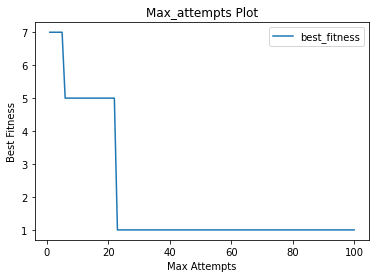

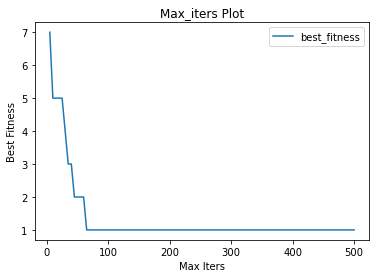

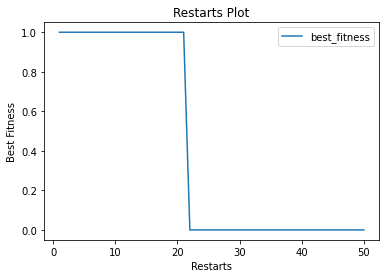

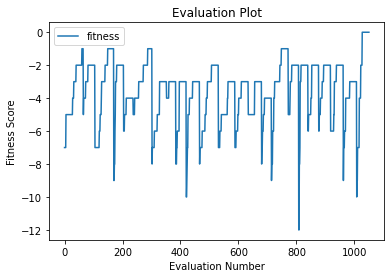

In [37]:
RH_max_attempts,RH_max_iters,RH_best_state,RH_best_fitness,max_attempts_for_graphs_RH, max_iters_for_graphs_RH,evals_for_graphs_RH, RH_run_time\
= RandHill(problem_queen,  "N-Queen")

The max attempts is:  44
The max iters is:  355
The best state is:  [5 2 0 7 4 1 3 6]
The fitness is:  0.0
Run Time is:  0.015518799999881594


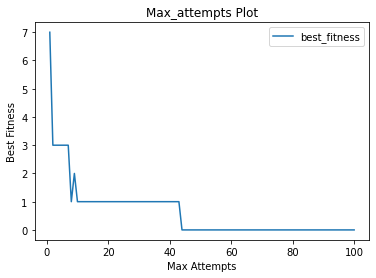

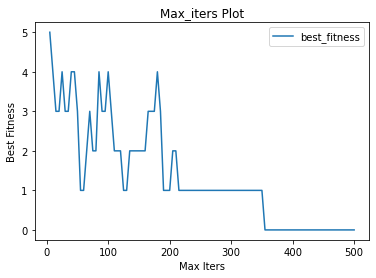

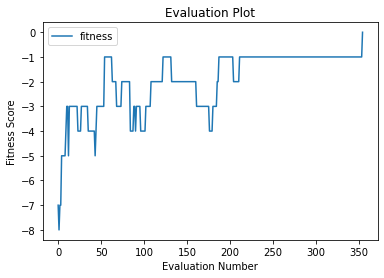

In [40]:
SA_max_attempts,SA_max_iters,SA_best_state,SA_best_fitness,max_attempts_for_graphs_SA, max_iters_for_graphs_SA,evals_for_graphs_SA, SA_run_time\
= SimAnneal(problem_queen,  "N-Queen")

The pop size is:  240
The mutation prob is:  0.2
The max attempts is:  93
The max iters is:  155
The best state is:  [3 5 7 2 0 6 4 1]
The fitness is:  0.0
Run Time is:  2.8607112999998208


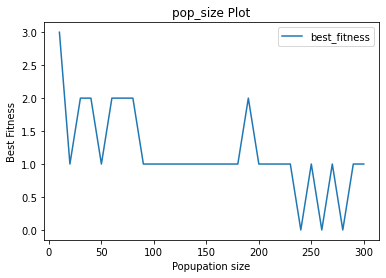

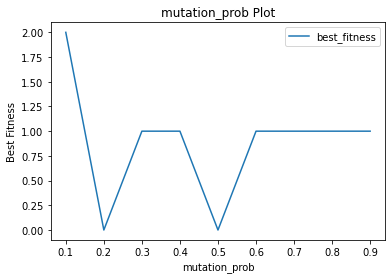

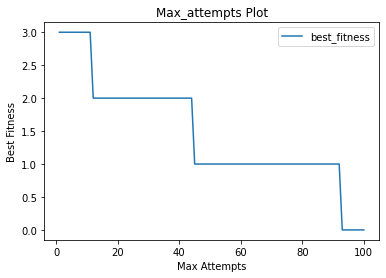

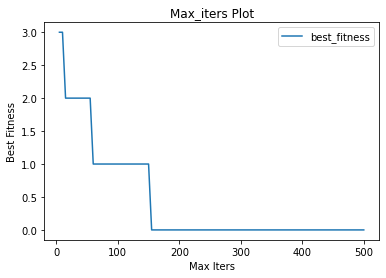

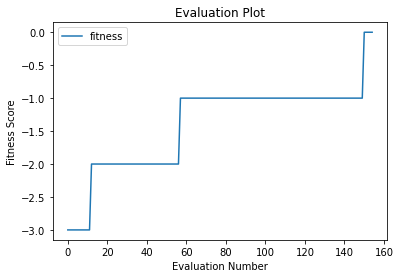

In [38]:
GA_max_attempts,GA_max_iters,GA_best_state,GA_best_fitness,max_attempts_for_graphs_GA, max_iters_for_graphs_GA,evals_for_graphs_GA, GA_run_time\
= Genetic(problem_queen, "N-Queen")

The pop size is:  80
The keep pct is:  0.1
The max attempts is:  1
The max iters is:  5
The best state is:  [4 0 7 5 2 6 1 3]
The fitness is:  0.0
Run Time is:  0.020241100000021106


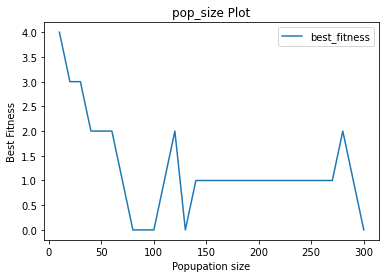

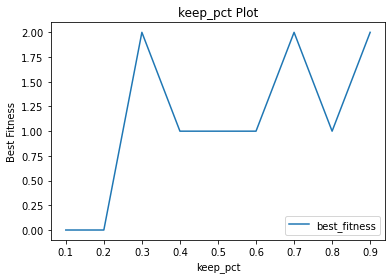

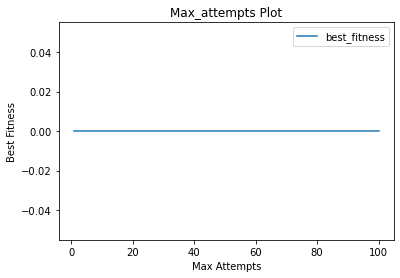

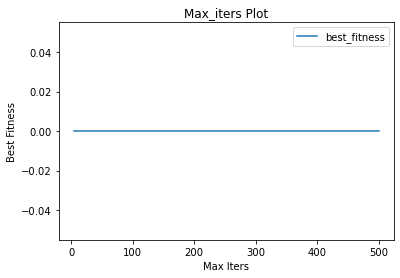

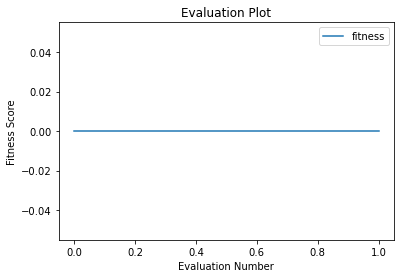

In [39]:
M_max_attempts,M_max_iters,M_best_state,M_best_fitness,max_attempts_for_graphs_M, max_iters_for_graphs_M,evals_for_graphs_M, M_run_time\
= MIMIC(problem_queen, "N-Queen")

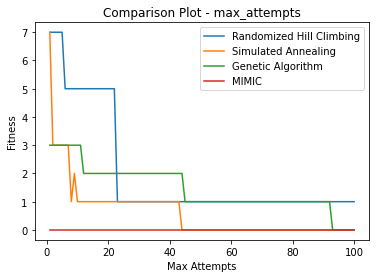

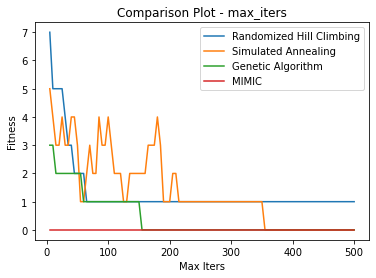

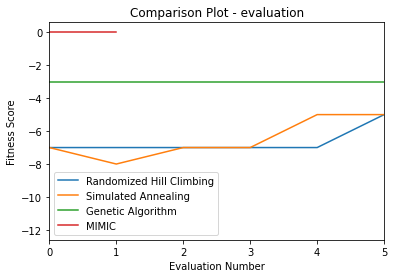

In [41]:
# Comparison

max_attempts_for_graphs_RH["alg"] = "Randomized Hill Climbing"
max_attempts_for_graphs_SA["alg"] = "Simulated Annealing"
max_attempts_for_graphs_GA["alg"] = "Genetic Algorithm"
max_attempts_for_graphs_M["alg"] = "MIMIC"

max_iters_for_graphs_RH["alg"] = "Randomized Hill Climbing"
max_iters_for_graphs_SA["alg"] = "Simulated Annealing"
max_iters_for_graphs_GA["alg"] = "Genetic Algorithm"
max_iters_for_graphs_M["alg"] = "MIMIC"

evals_for_graphs_RH["alg"] = "Randomized Hill Climbing"
evals_for_graphs_SA["alg"] = "Simulated Annealing"
evals_for_graphs_GA["alg"] = "Genetic Algorithm"
evals_for_graphs_M["alg"] = "MIMIC"

max_attempts_for_graphs = pd.concat([max_attempts_for_graphs_RH, max_attempts_for_graphs_SA,\
                           max_attempts_for_graphs_GA, max_attempts_for_graphs_M], ignore_index=True)
ax = sns.lineplot(data = max_attempts_for_graphs, x="max_attempts", y='best_fitness', hue = "alg")
ax.legend_.set_title(None)
ax.set_xlabel("Max Attempts")
ax.set_ylabel("Fitness")
ax.set_title("Comparison Plot - max_attempts")
plt.savefig("C:/Users/jzhang/Desktop/HW2/All/max_attempts_compare_N-Queen.png")
plt.show()
plt.close()

max_iters_for_graphs = pd.concat([max_iters_for_graphs_RH, max_iters_for_graphs_SA,\
                           max_iters_for_graphs_GA, max_iters_for_graphs_M], ignore_index=True)
ax = sns.lineplot(data = max_iters_for_graphs, x="max_iters", y='best_fitness', hue = "alg")
ax.legend_.set_title(None)
ax.set_xlabel("Max Iters")
ax.set_ylabel("Fitness")
ax.set_title("Comparison Plot - max_iters")
plt.savefig("C:/Users/jzhang/Desktop/HW2/All/max_iters_compare_N-Queen.png")
plt.show()
plt.close()

evals_for_graphs = pd.concat([evals_for_graphs_RH, evals_for_graphs_SA,\
                           evals_for_graphs_GA, evals_for_graphs_M], ignore_index=True)
ax = sns.lineplot(data = evals_for_graphs, x="evaluation", y='fitness', hue = "alg")
ax.legend_.set_title(None)
ax.set_xlabel("Evaluation Number")
ax.set_ylabel("Fitness Score")
# xlim_max = ceil(times_for_graphs.run_time.min())
ax.set_xlim([0, 5])
ax.set_title("Comparison Plot - evaluation")
plt.savefig("C:/Users/jzhang/Desktop/HW2/All/evaluation_compare_N-Queen.png")
plt.show()
plt.close()

## Problem 3 - Knapsack

In [59]:
weights = [10, 5, 2, 8, 15, 24, 12, 20, 7, 3, 17, 1, 18, 30, 21]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
max_weight_pct = 0.6
fitness = mlrose.Knapsack(weights, values, max_weight_pct)
problem_Knapsack = mlrose.DiscreteOpt(length=15,fitness_fn=fitness,maximize=True,max_val=3)

The max attempts is:  1
The max iters is:  5
The restarts is:  39
The best state is:  [2 2 1 1 0 0 0 0 2 0 0 2 0 1 1]
The fitness is:  84.0
Run Time is:  0.0020568999998431536


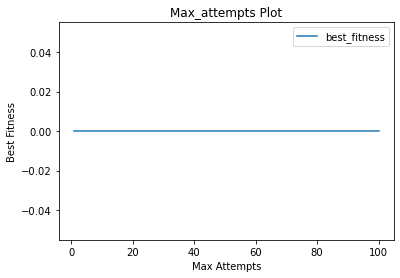

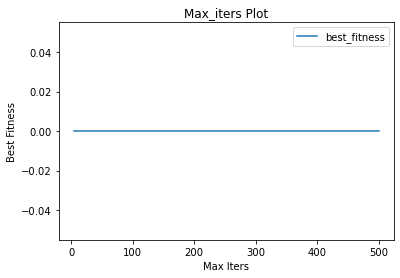

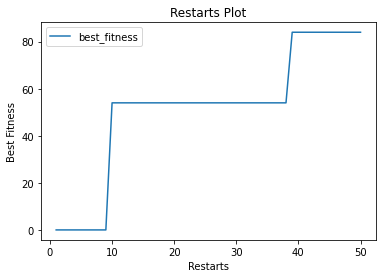

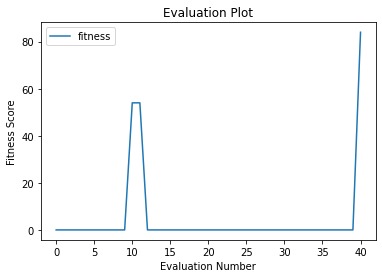

In [60]:
RH_max_attempts,RH_max_iters,RH_best_state,RH_best_fitness,max_attempts_for_graphs_RH, max_iters_for_graphs_RH,evals_for_graphs_RH, RH_run_time\
= RandHill(problem_Knapsack,  "Knapsack",maximize=True,)

The max attempts is:  14
The max iters is:  30
The best state is:  [0 0 1 0 0 2 1 0 0 1 0 2 1 1 0]
The fitness is:  83.0
Run Time is:  0.0013381999997363891


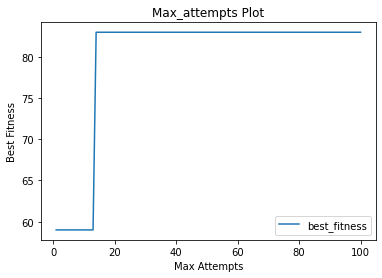

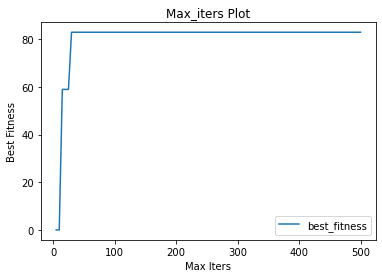

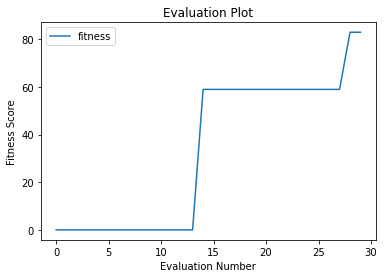

In [61]:
SA_max_attempts,SA_max_iters,SA_best_state,SA_best_fitness,max_attempts_for_graphs_SA, max_iters_for_graphs_SA,evals_for_graphs_SA, SA_run_time\
= SimAnneal(problem_Knapsack,  "Knapsack",maximize=True,)

The pop size is:  90
The mutation prob is:  0.2
The max attempts is:  15
The max iters is:  30
The best state is:  [0 0 2 2 0 0 0 0 2 2 1 2 2 0 1]
The fitness is:  128.0
Run Time is:  0.20825739999963844


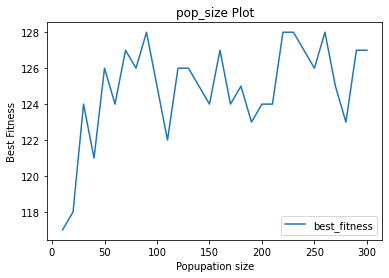

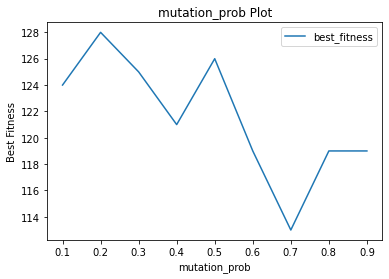

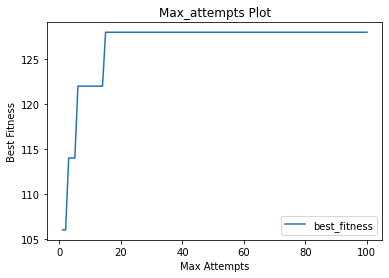

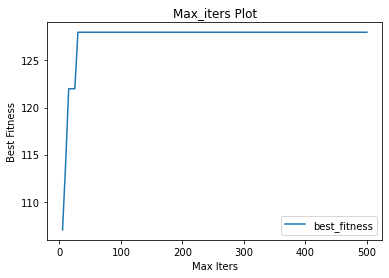

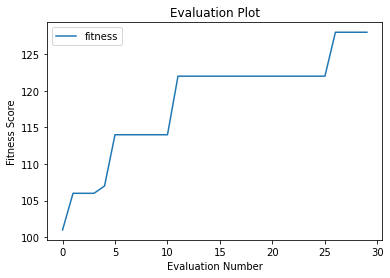

In [62]:
GA_max_attempts,GA_max_iters,GA_best_state,GA_best_fitness,max_attempts_for_graphs_GA, max_iters_for_graphs_GA,evals_for_graphs_GA, GA_run_time\
= Genetic(problem_Knapsack, "Knapsack",maximize=True,)

The pop size is:  270
The keep pct is:  0.1
The max attempts is:  4
The max iters is:  15
The best state is:  [0 0 2 0 0 0 1 0 2 2 0 2 2 0 2]
The fitness is:  131.0
Run Time is:  0.13716119999935472


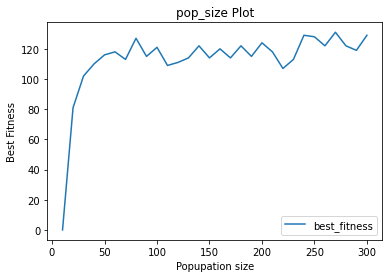

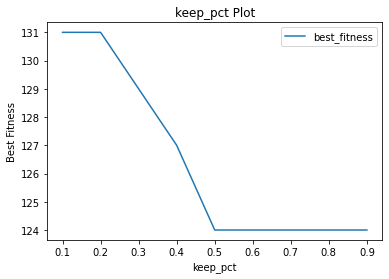

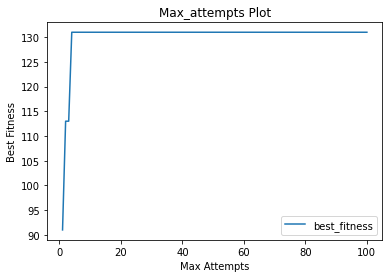

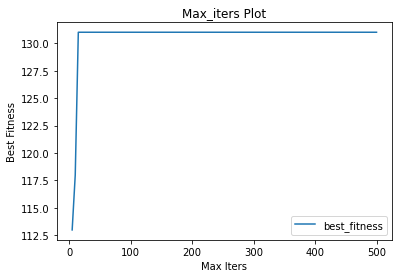

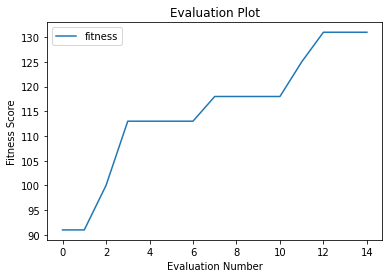

In [63]:
M_max_attempts,M_max_iters,M_best_state,M_best_fitness,max_attempts_for_graphs_M, max_iters_for_graphs_M,evals_for_graphs_M, M_run_time\
= MIMIC(problem_Knapsack, "Knapsack",maximize=True,)

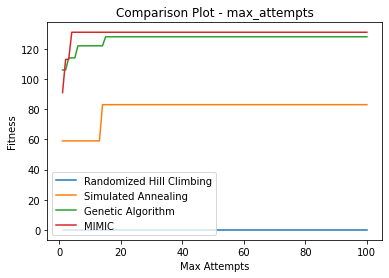

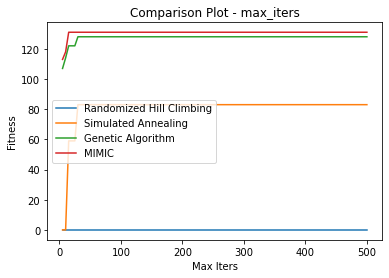

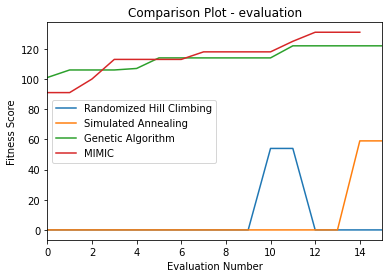

In [65]:
# Comparison

max_attempts_for_graphs_RH["alg"] = "Randomized Hill Climbing"
max_attempts_for_graphs_SA["alg"] = "Simulated Annealing"
max_attempts_for_graphs_GA["alg"] = "Genetic Algorithm"
max_attempts_for_graphs_M["alg"] = "MIMIC"

max_iters_for_graphs_RH["alg"] = "Randomized Hill Climbing"
max_iters_for_graphs_SA["alg"] = "Simulated Annealing"
max_iters_for_graphs_GA["alg"] = "Genetic Algorithm"
max_iters_for_graphs_M["alg"] = "MIMIC"

evals_for_graphs_RH["alg"] = "Randomized Hill Climbing"
evals_for_graphs_SA["alg"] = "Simulated Annealing"
evals_for_graphs_GA["alg"] = "Genetic Algorithm"
evals_for_graphs_M["alg"] = "MIMIC"

max_attempts_for_graphs = pd.concat([max_attempts_for_graphs_RH, max_attempts_for_graphs_SA,\
                           max_attempts_for_graphs_GA, max_attempts_for_graphs_M], ignore_index=True)
ax = sns.lineplot(data = max_attempts_for_graphs, x="max_attempts", y='best_fitness', hue = "alg")
ax.legend_.set_title(None)
ax.set_xlabel("Max Attempts")
ax.set_ylabel("Fitness")
ax.set_title("Comparison Plot - max_attempts")
plt.savefig("C:/Users/jzhang/Desktop/HW2/All/max_attempts_compare_Knapsack.png")
plt.show()
plt.close()

max_iters_for_graphs = pd.concat([max_iters_for_graphs_RH, max_iters_for_graphs_SA,\
                           max_iters_for_graphs_GA, max_iters_for_graphs_M], ignore_index=True)
ax = sns.lineplot(data = max_iters_for_graphs, x="max_iters", y='best_fitness', hue = "alg")
ax.legend_.set_title(None)
ax.set_xlabel("Max Iters")
ax.set_ylabel("Fitness")
ax.set_title("Comparison Plot - max_iters")
plt.savefig("C:/Users/jzhang/Desktop/HW2/All/max_iters_compare_Knapsack.png")
plt.show()
plt.close()

evals_for_graphs = pd.concat([evals_for_graphs_RH, evals_for_graphs_SA,\
                           evals_for_graphs_GA, evals_for_graphs_M], ignore_index=True)
ax = sns.lineplot(data = evals_for_graphs, x="evaluation", y='fitness', hue = "alg")
ax.legend_.set_title(None)
ax.set_xlabel("Evaluation Number")
ax.set_ylabel("Fitness Score")
# xlim_max = ceil(times_for_graphs.run_time.min())
ax.set_xlim([0, 15])
ax.set_title("Comparison Plot - evaluation")
plt.savefig("C:/Users/jzhang/Desktop/HW2/All/evaluation_compare_Knapsack.png")
plt.show()
plt.close()

## Try - Traveling Salesman

In [66]:
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]
fitness_coords = mlrose.TravellingSales(coords = coords_list)

problem_TSP = mlrose.TSPOpt(length = 8, fitness_fn = fitness_coords, maximize=False)

The max attempts is:  50
The max iters is:  65
The restarts is:  7
The best state is:  [0 7 6 5 4 3 2 1]
The fitness is:  17.342617547667327
Run Time is:  0.046220500000345055


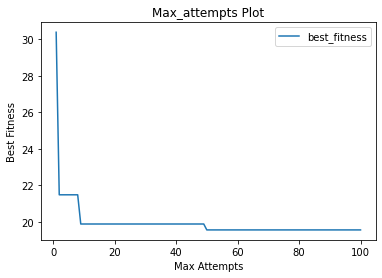

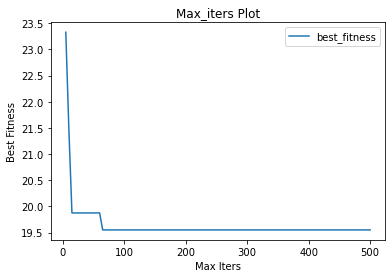

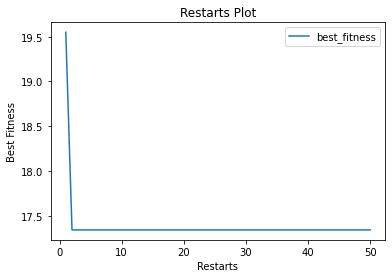

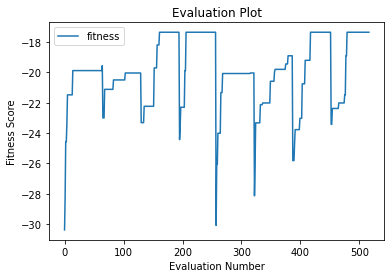

In [67]:
RH_max_attempts,RH_max_iters,RH_best_state,RH_best_fitness,max_attempts_for_graphs_RH, max_iters_for_graphs_RH,times_for_graphs_RH, RH_run_time\
= RandHill(problem_TSP,  "TSP")

The max attempts is:  36
The max iters is:  160
The best state is:  [1 2 3 4 5 6 7 0]
The fitness is:  17.342617547667327
Run Time is:  0.016325900000083493


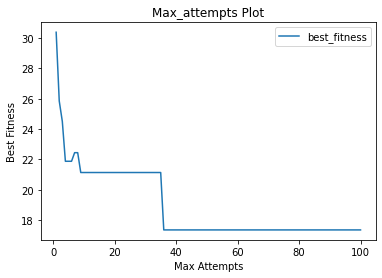

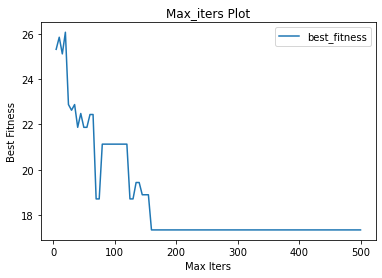

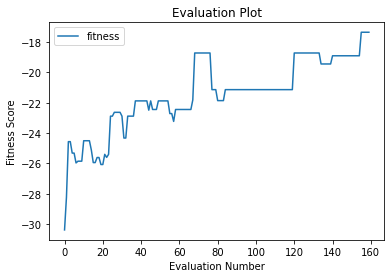

In [68]:
SA_max_attempts,SA_max_iters,SA_best_state,SA_best_fitness,max_attempts_for_graphs_SA, max_iters_for_graphs_SA,times_for_graphs_SA, SA_run_time\
= SimAnneal(problem_TSP,  "TSP")

The pop size is:  40
The mutation prob is:  0.2
The max attempts is:  40
The max iters is:  45
The best state is:  [0 7 6 5 4 3 2 1]
The fitness is:  17.342617547667327
Run Time is:  0.2547274999997171


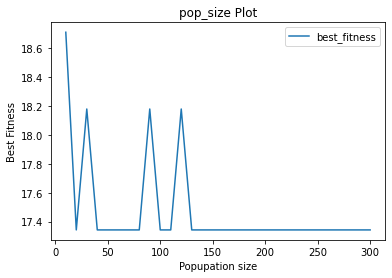

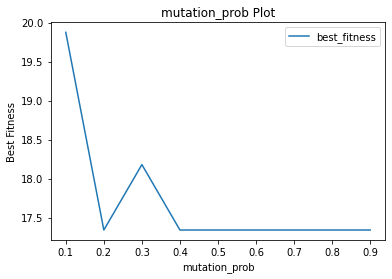

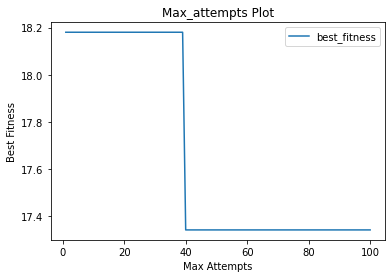

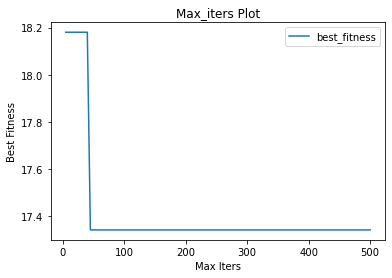

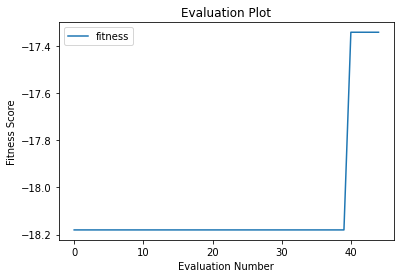

In [69]:
GA_max_attempts,GA_max_iters,GA_best_state,GA_best_fitness,max_attempts_for_graphs_GA, max_iters_for_graphs_GA,times_for_graphs_GA, GA_run_time\
= Genetic(problem_TSP, "TSP")

In [ ]:
M_max_attempts,M_max_iters,M_best_state,M_best_fitness,max_attempts_for_graphs_M, max_iters_for_graphs_M,times_for_graphs_M, M_run_time\
= MIMIC(problem_TSP, "TSP")

In [ ]:
# Comparison

max_attempts_for_graphs_RH["alg"] = "Randomized Hill Climbing"
max_attempts_for_graphs_SA["alg"] = "Simulated Annealing"
max_attempts_for_graphs_GA["alg"] = "Genetic Algorithm"
max_attempts_for_graphs_M["alg"] = "MIMIC"

max_iters_for_graphs_RH["alg"] = "Randomized Hill Climbing"
max_iters_for_graphs_SA["alg"] = "Simulated Annealing"
max_iters_for_graphs_GA["alg"] = "Genetic Algorithm"
max_iters_for_graphs_M["alg"] = "MIMIC"

times_for_graphs_RH["alg"] = "Randomized Hill Climbing"
times_for_graphs_SA["alg"] = "Simulated Annealing"
times_for_graphs_GA["alg"] = "Genetic Algorithm"
times_for_graphs_M["alg"] = "MIMIC"

max_attempts_for_graphs = pd.concat([max_attempts_for_graphs_RH, max_attempts_for_graphs_SA,\
                           max_attempts_for_graphs_GA, max_attempts_for_graphs_M], ignore_index=True)
ax = sns.lineplot(data = max_attempts_for_graphs, x="max_attempts", y='best_fitness', hue = "alg")
ax.legend_.set_title(None)
ax.set_xlabel("Max Attempts")
ax.set_ylabel("Fitness")
ax.set_title("Comparison Plot - max_attempts")
plt.savefig("C:/Users/jzhang/Desktop/HW2/All/max_attempts_compare_TSP.png")
plt.show()
plt.close()

max_iters_for_graphs = pd.concat([max_iters_for_graphs_RH, max_iters_for_graphs_SA,\
                           max_iters_for_graphs_GA, max_iters_for_graphs_M], ignore_index=True)
ax = sns.lineplot(data = max_iters_for_graphs, x="max_iters", y='best_fitness', hue = "alg")
ax.legend_.set_title(None)
ax.set_xlabel("Max Iters")
ax.set_ylabel("Fitness")
ax.set_title("Comparison Plot - max_iters")
plt.savefig("C:/Users/jzhang/Desktop/HW2/All/max_iters_compare_TSP.png")
plt.show()
plt.close()

evals_for_graphs = pd.concat([evals_for_graphs_RH, evals_for_graphs_SA,\
                           evals_for_graphs_GA, evals_for_graphs_M], ignore_index=True)
ax = sns.lineplot(data = evals_for_graphs, x="evaluation", y='fitness', hue = "alg")
ax.legend_.set_title(None)
ax.set_xlabel("Evaluation Number")
ax.set_ylabel("Fitness Score")
# ax.set_xlim([0, 0.05])
ax.set_title("Comparison Plot - evaluation")
plt.savefig("C:/Users/jzhang/Desktop/HW2/All/evaluation_compare_TSP.png")
plt.show()
plt.close()

# Part 2

In [108]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV, learning_curve, KFold 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score, roc_curve, auc

In [77]:
data_name = "online_shoppers_intention.csv"
path = "C:/Users/jzhang/Desktop/HW2/"
df = pd.read_csv(path + data_name)

nums,cats = df.select_dtypes(include=np.number), df.select_dtypes(exclude=np.number)
nums_t = pd.DataFrame(PowerTransformer().fit_transform(nums),columns=nums.columns)
alls = pd.concat([nums_t,cats],axis=1)
alls['Weekend'].replace({False:0,True:1},inplace =True)
alls['Revenue'].replace({'No':0,'Yes':1},inplace =True)
alls = pd.get_dummies(alls,drop_first=True)

In [98]:
X = alls.iloc[:, :-1]
y = alls.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

names = X_train.columns
X_train = pd.DataFrame(scale(X_train))
X_train.columns = names

names = X_test.columns
X_test = pd.DataFrame(scale(X_test))
X_test.columns = names

In [214]:
def Evaluation_basic(model,X_train, X_test, y_train, y_test, name):
    
    t0 = time.time()
    model.fit(X_train, y_train)
    t1 = time.time()
    train_time = t1 - t0
     
    t0 = time.time()   
    y_pred = model.predict(X_test)
    t1 = time.time()
    pred_time = t1 - t0
    
    auc = roc_auc_score(y_test, y_pred)
    bias_error = np.mean(1-auc)
    variance_error = np.std(auc,ddof=1)
    f1 = f1_score(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    
    # confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(pd.DataFrame(cm),annot=True,fmt='d',cbar=False, cmap="YlGnBu")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig(path + 'NN/confusion_matrix_'+ name + '.png')
    plt.show()
    plt.close()
    
    # ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc
    plt.figure()
    plt.plot(fpr, tpr,lw=2, label="ROC curve")
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="best")
    plt.savefig(path + 'NN/roc_curve_'+ name + '.png')
    plt.show()
    plt.close()
    
    # Learning Curve
    sizes = np.linspace(0.1, 1.0, 20)
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train,train_sizes =sizes, scoring='f1',cv=5)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('F1 Score')
    plt.legend(loc='best')
    plt.savefig(path + 'NN/learning_curve_'+ name + '.png')
    plt.show()
    plt.close()
    
    # fitness curve
    model.fit(X_train, y_train)
    train_loss = model.fitness_curve
#     model.fit(X_test, y_test)
#     test_loss = model.fitness_curve

    plt.figure()
    plt.title("Fitness Curve")
    plt.plot(train_loss, label="training")
#     plt.plot(test_loss, label="testing")
    plt.xlabel("Number of Iterations")
    plt.ylabel("fitness score")
    plt.legend(loc="best")
    plt.savefig(path + 'NN/loss_curve_'+ name + '.png')
    plt.show()
    plt.close()

    
    print('The train time is: ', train_time)
    print('The test time is: ', pred_time)
    print('Accuracy is: ', accuracy)
    
    return train_time, pred_time, train_mean, test_mean, train_loss, train_sizes, f1, accuracy, bias_error, variance_error


In [215]:
def NN(X_train, y_train, X_test, y_test,alg, name):
        
    # best max_attempts - Error
    
    compares = []
    intervals, interval_unit = 50, 2
    for i in range(1, intervals + 1):
        max_attempts = i * interval_unit
        # hidden size = 10, learning rate 0.01
        model = mlrose.NeuralNetwork(hidden_nodes=[10],activation='relu',
                                    algorithm=alg, learning_rate=0.01,max_attempts=max_attempts,
                                    schedule=mlrose.ExpDecay(),early_stopping=True,random_state=2)
        model.fit(X_train, y_train)
        loss_train = model.loss
        model.fit(X_test, y_test)
        loss_test = model.loss
        compares.append([max_attempts, loss_test, loss_train])
        
    max_attempts_graph = pd.DataFrame(compares, columns=["max_attempts", 'Test Loss','Train Loss'])
    ax = max_attempts_graph.plot(x="max_attempts", y=['Test Loss','Train Loss'], title="max_attempts plot")
    ax.set_xlabel("max_attempts")
    ax.set_ylabel('Model Error')
    plt.savefig(path + 'NN/max_attempts_'+ name + '.png')
    plt.close()

    min_fitness =  max_attempts_graph["Test Loss"].min()
    max_attempts = int(max_attempts_graph[max_attempts_graph["Test Loss"] == min_fitness]["max_attempts"].min())


    
    # best max_iters - Error
    
    compares = []
    intervals,interval_unit = 100,10
    for i in range(1, intervals + 1):
        max_iters = i * interval_unit
        
        model = mlrose.NeuralNetwork(hidden_nodes=[10],activation='relu',
                                    algorithm=alg, learning_rate=0.01,max_attempts=max_attempts,max_iters=max_iters,
                                    schedule=mlrose.ExpDecay(),early_stopping=True,random_state=2)
        model.fit(X_train, y_train)
        loss_train = model.loss
        model.fit(X_test, y_test)
        loss_test = model.loss
        compares.append([max_iters, loss_test, loss_train])
        
    max_iters_graph = pd.DataFrame(compares, columns=["max_iters", 'Test Loss','Train Loss'])
    ax = max_iters_graph.plot(x="max_iters", y=['Test Loss','Train Loss'], title="max_iters plot")
    ax.set_xlabel("max_iters")
    ax.set_ylabel('Model Error')
    plt.savefig(path + 'NN/max_iters_'+ name + '.png')
    plt.close()

    min_fitness =  max_iters_graph["Test Loss"].min()
    max_iterts = int(max_iters_graph[max_iters_graph["Test Loss"] == min_fitness]["max_iters"].min())

    
    # best LR - Error
    
    compares = []
    if alg == "simulated_annealing":
        lr_range = [0.005, 0.008, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.3, 0.5]
    else: lr_range = [0.001,0.005, 0.01, 0.05, 0.1,0.2,0.5,0.6,0.8,1,2]
    for i in lr_range:
        lr = float(i)
        
        model = mlrose.NeuralNetwork(hidden_nodes=[10],activation='relu',
                                    algorithm=alg, learning_rate=lr,max_attempts=max_attempts,max_iters=max_iters,
                                    schedule=mlrose.ExpDecay(),early_stopping=True,random_state=2)
        model.fit(X_train, y_train)
        loss_train = model.loss
        model.fit(X_test, y_test)
        loss_test = model.loss
        compares.append([lr, loss_test, loss_train])
        
    lr_graph = pd.DataFrame(compares, columns=["LR", 'Test Loss','Train Loss'])
    ax = lr_graph.plot(x="LR", y=['Test Loss','Train Loss'], title="learning rate plot")
    ax.set_xlabel("learning rate")
    ax.set_ylabel('Model Error')
    plt.savefig(path + 'NN/LR_'+ name + '.png')
    plt.close()

    min_fitness =  lr_graph["Test Loss"].min()
    lr = lr_graph[lr_graph["Test Loss"] == min_fitness]["LR"].max()
    
    
    # Evaluation and Time
    
    model = mlrose.NeuralNetwork(hidden_nodes=[10],activation='relu',
                                    algorithm=alg, learning_rate=lr,max_attempts=max_attempts,max_iters=max_iters,
                                    schedule=mlrose.ExpDecay(),early_stopping=True,random_state=2, curve = True)
   
    print('The max attempts is: ', max_attempts)
    print('The max iters is: ', max_iters)
    print('The learning rate is: ', lr)
    
    return  max_attempts_graph, max_iters_graph, lr_graph, model

### random_hill_climb

In [ ]:
# max_attempts_graph_RH, max_iters_graph_RH, lr_graph_RH, model_RH\
# = NN(X_train, y_train, X_test, y_test,"random_hill_climb", "RH")
model = mlrose.NeuralNetwork(hidden_nodes=[10],activation='relu',
                                    algorithm="random_hill_climb", learning_rate=1,max_attempts=1000,max_iters=2500,
                                    schedule=mlrose.ExpDecay(),early_stopping=True,random_state=2, curve = True)

In [ ]:
train_time_RH, pred_time_RH,train_mean_RH, test_mean_RH,fitness_RH, train_sizes,f1_RH, accuracy_RH, bias_error_RH, variance_error_RH\
= Evaluation_basic(model_RH,X_train, X_test, y_train, y_test, "RH")

### simulated_annealing

In [ ]:
# max_attempts_graph_SA, max_iters_graph_SA, lr_graph_SA, model_SA\
# = NN(X_train, y_train, X_test, y_test,"simulated_annealing", "SA")  
model_SA = mlrose.NeuralNetwork(hidden_nodes=[10],activation='relu',
                                    algorithm="simulated_annealing", learning_rate=1,max_attempts=100,max_iters=2500,
                                    schedule=mlrose.ExpDecay(),early_stopping=True,random_state=2, curve = True)

In [ ]:
train_time_SA, pred_time_SA,train_mean_SA, test_mean_SA,fitness_SA, train_sizes, f1_SA, accuracy_SA, bias_error_SA, variance_error_SA\
= Evaluation_basic(model_SA,X_train, X_test, y_train, y_test, "SA")

### genetic_alg

In [234]:
model_GA = mlrose.NeuralNetwork(hidden_nodes=[10],activation='relu',
                                    algorithm="genetic_alg", learning_rate=0.01,max_attempts=1000,max_iters=1000,early_stopping=True,random_state=2, curve = True)

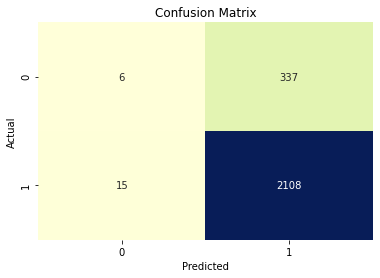

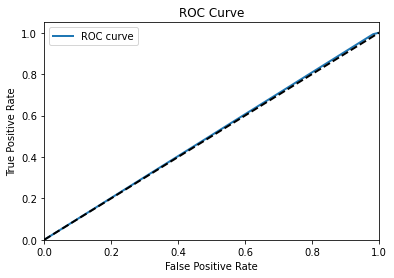

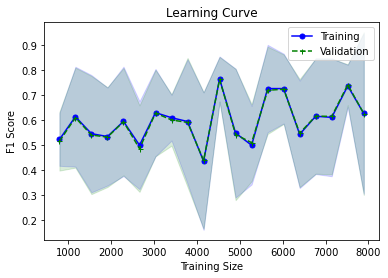

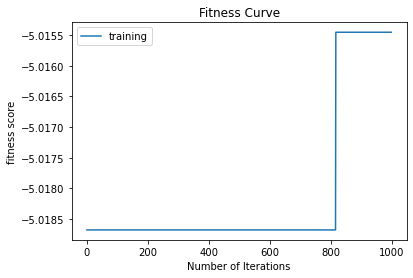

The train time is:  879.1624646186829
The test time is:  0.0
Accuracy is:  0.8572587185725872


In [235]:
train_time_GA, pred_time_GA,train_mean_GA, test_mean_GA,fitness_GA,train_sizes, f1_GA, accuracy_GA, bias_error_GA, variance_error_GA\
= Evaluation_basic(model_GA,X_train, X_test, y_train, y_test, "GA")

### Comparison

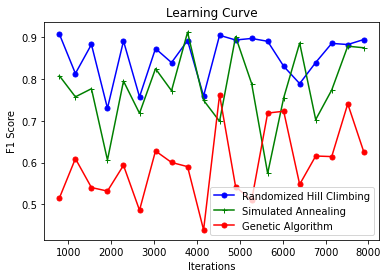

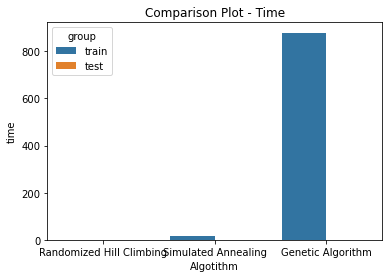

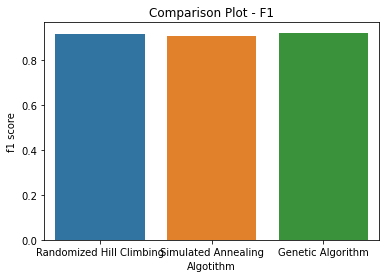

In [250]:
# Comparison

names = ["Randomized Hill Climbing","Simulated Annealing","Genetic Algorithm"]


train_times = pd.DataFrame(zip(names, [train_time_RH, train_time_SA, train_time_GA]), columns = ["alg","time"])
test_times = pd.DataFrame(zip(names, [pred_time_RH, pred_time_SA, pred_time_GA]), columns = ["alg","time"])
f1_scores = pd.DataFrame(zip(names, [f1_RH,f1_SA,f1_GA]), columns = ["alg","f1_score"])

train_times["group"] = "train"
test_times["group"] = "test"

plot_times = pd.concat([train_times,test_times], ignore_index=True)



plt.plot(train_sizes, test_mean_RH, color='blue', marker='o', markersize=5, label='Randomized Hill Climbing')
plt.plot(train_sizes, test_mean_SA, color='green', marker='+', markersize=5, label='Simulated Annealing')
plt.plot(train_sizes, test_mean_GA, color='red', marker='o', markersize=5, label='Genetic Algorithm')
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.savefig(path + 'NN/Compare_learning_curve.png')
plt.show()
plt.close()


ax = sns.barplot(data = plot_times, x="alg", y='time', hue = "group")
ax.set_xlabel("Algotithm")
ax.set_ylabel("time")
plt.title("Comparison Plot - Time")
plt.savefig(path + 'NN/compare_time.png')
plt.show()
plt.close()

ax = sns.barplot(data = f1_scores, x="alg", y='f1_score')
ax.set_xlabel("Algotithm")
ax.set_ylabel("f1 score")
plt.title("Comparison Plot - F1")
plt.savefig(path + 'NN/compare_f1.png')
plt.show()
plt.close()